<a href="https://colab.research.google.com/github/dee-ah-nuh/Food_Sales_Predictions/blob/main/Food_Sales_Predictions_with_Ordinal_MLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [547]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [548]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import seaborn as sns

In [549]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Bootcamp/Project - Food Sales Predictions/sales_predictions (1).csv')
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [550]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

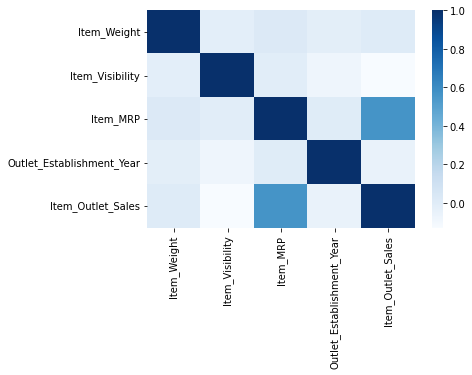

In [551]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues')

In [552]:
correlation = df["Item_MRP"].corr(df["Item_Outlet_Sales"])
correlation

0.5675744466569194

Validation Split

In [553]:
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [554]:
# select only object columns
nominal_selector = X_train.select_dtypes( include='object')

In [555]:
# check value counts for each object column
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].value_counts(), '\n')

Item_Identifier
FDF52    9
FDQ40    9
DRE49    9
NCB18    9
FDD38    9
        ..
DRH59    1
FDO28    1
NCR54    1
FDS39    1
FDG28    1
Name: Item_Identifier, Length: 1550, dtype: int64 

Item_Fat_Content
Low Fat    3783
Regular    2176
LF          260
reg          87
low fat      86
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods            122
Breakfast                 84
Seafood                   42
Name: Item_Type, dtype: int64 

Outlet_Identifier
OUT027    723
OUT035    709
OUT018    704
OUT045    699
OUT017    698
OUT046    695
OUT013    689
OUT049    676
OUT010    415
OUT019    384
Name: Outle

Initiate Power Rangers (Transformers)

In [556]:
scaler = StandardScaler()
scaler2 = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
missing_imputer = SimpleImputer(strategy='constant', fill_value='Missing')

Ordinal Encoding

In [557]:
size_label = ["Small", "Medium", "High"]
location_type_label = ["Tier 1", "Tier 2", "Tier 3"]
ordered_labels = [size_label, location_type_label]
ordered_labels

[['Small', 'Medium', 'High'], ['Tier 1', 'Tier 2', 'Tier 3']]

In [558]:
ordinal_encoding  = OrdinalEncoder(categories=ordered_labels)

Pipeline for Numeric and Categorical Data

In [559]:
nominal_pipeline = make_pipeline(missing_imputer, ohe)
numeric_pipeline = make_pipeline(mean_imputer, scaler)
ordinal_pipeline = make_pipeline(freq_imputer, ordinal_encoding, scaler2)


Tuples & Pipelines with columns

In [560]:
ordinal_columns = ['Outlet_Size', 'Outlet_Location_Type']

In [561]:
number_selector = make_column_selector(dtype_include='number')

In [562]:
nominal_tup = (nominal_pipeline, (['Outlet_Type', 'Outlet_Identifier', 'Item_Type', 'Item_Fat_Content', 'Item_Identifier']))
numeric_tup = (numeric_pipeline, number_selector)
ordinal_tup = (ordinal_pipeline, ordinal_columns)

In [563]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor


Create Column Transformer

In [564]:
preprocessor = make_column_transformer(ordinal_tup, numeric_tup, nominal_tup, remainder='passthrough')

In [565]:
base_pipe = make_pipeline(preprocessor, DummyRegressor(strategy = 'mean'))
base_pipe.fit(X_train, y_train);

In [566]:
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg)
reg_pipe.fit(X_train, y_train); 

In [567]:
train_score = reg_pipe.score(X_train, y_train)
print(train_score)

0.6650747531175036


In [568]:
test_score = reg_pipe.score(X_test, y_test)
print(test_score)

-4.759866523570703e+19


In [569]:
#Train test predictions
xtrain_preds = reg_pipe.predict(X_train)
test_preds = reg_pipe.predict(X_test)
xtrain_preds

array([4693., 4733., 2000., ..., 4850.,  657., 1271.])

In [570]:
r2_train = r2_score(y_train, xtrain_preds)
r2_test = r2_score(y_test, test_preds)
r2_train

0.6650747531175036

In [571]:
r2_test

-4.759866523570703e+19

In [572]:
rmse_train = np.sqrt(mean_squared_error(y_train, xtrain_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

rmse_test

11459652539026.996

In [573]:
rmse_train

995.588485508129

In [574]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train);

In [575]:
train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)

In [576]:
train_score = dec_tree_pipe.score(X_train, y_train)
test_score = dec_tree_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.23652849795751107


In [577]:
max_depth_range = list(range(2, 36)) 
r2 = []
for depth in max_depth_range:
    dec_tree_max = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree_max_pipe = make_pipeline(preprocessor, dec_tree_max)
    dec_tree_max_pipe.fit(X_train, y_train)
    score = dec_tree_max_pipe.score(X_test, y_test)
    r2.append(score)

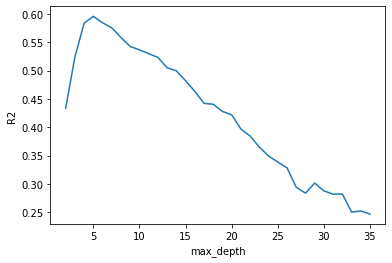

In [578]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');


Fit on train only.

In [579]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5.5, random_state = 42)
dec_tree_5_pipe = make_pipeline(preprocessor, dec_tree_5)
dec_tree_5_pipe.fit(X_train, y_train)
train_5_score = dec_tree_5_pipe.score(X_train, y_train)
test_5_score = dec_tree_5_pipe.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6042066848171654
0.5960564372160062


In [580]:
bagreg = BaggingRegressor(random_state = 42)
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [581]:
bagreg_pipe = make_pipeline(preprocessor, bagreg)
bagreg_pipe.fit(X_train, y_train);

In [582]:
bagreg_pipe.predict(X_test)

array([ 810.41176, 1070.40666,  912.21258, ..., 4943.8979 , 2125.83282,
       1545.38838])

In [583]:
bagreg_train_score = bagreg_pipe.score(X_train, y_train)
bagreg_test_score = bagreg_pipe.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9187129955826051
0.5361384464525489


In [584]:
rf = RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(preprocessor, rf)

In [588]:
rf_pipe.fit(X_train, y_train);

In [589]:
rf_pipe.predict(X_test)

array([ 715.655104,  905.401446,  940.768742, ..., 4216.538032,
       1902.263838, 2119.647538])

In [590]:
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9377713584149171
0.5514793218551158


In [608]:
rf_60 = RandomForestRegressor(max_depth = 60, random_state = 42)
rf_60_pipe = make_pipeline(preprocessor, rf_60)
rf_60_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                            

In [610]:
rf_60_train_score = rf_60_pipe.score(X_train, y_train)
rf_60_test_score = rf_60_pipe.score(X_test, y_test)
print(rf_60_train_score)
print(rf_60_test_score)

0.9375675544489716
0.5518032433566509


In [599]:
[estimator.get_depth() for estimator in rf.estimators_]

[52,
 53,
 59,
 57,
 54,
 60,
 64,
 59,
 65,
 49,
 69,
 62,
 49,
 59,
 58,
 66,
 62,
 61,
 52,
 61,
 57,
 46,
 65,
 63,
 46,
 56,
 56,
 60,
 59,
 60,
 53,
 69,
 52,
 54,
 52,
 61,
 87,
 58,
 54,
 66,
 59,
 54,
 66,
 49,
 52,
 62,
 68,
 68,
 54,
 51,
 60,
 51,
 55,
 62,
 58,
 67,
 49,
 61,
 68,
 49,
 52,
 66,
 66,
 61,
 62,
 65,
 56,
 58,
 69,
 66,
 53,
 61,
 58,
 53,
 57,
 47,
 58,
 61,
 60,
 56,
 66,
 63,
 55,
 51,
 64,
 57,
 60,
 72,
 58,
 48,
 71,
 61,
 65,
 62,
 52,
 46,
 53,
 58,
 60,
 61]

In [611]:
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf_200_pipe = make_pipeline(preprocessor ,rf_200)
# Fit the model
rf_200_pipe.fit(X_train, y_train)
# Obtain the scores
rf_200_train_score = rf_200_pipe.score(X_train, y_train)
rf_200_test_score = rf_200_pipe.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9388149838079992
0.5530943563552553


In [585]:
preprocessor.fit(X_train);

Transform both testing and training. 

In [586]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Check Result

In [612]:
X_train_processed

array([[ 0.28737371,  1.08494779,  0.81724868, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28737371,  1.08494779,  0.5563395 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28737371, -1.38477667, -0.13151196, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.28737371, -0.14991444,  1.11373638, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28737371, -0.14991444,  1.76600931, ...,  0.        ,
         0.        ,  0.        ],
       [-1.38404828, -1.38477667,  0.81724868, ...,  0.        ,
         0.        ,  0.        ]])